<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Statistics (b)

In [3]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')

## Principal Component Analysis

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
from sklearn.decomposition import KernelPCA

ModuleNotFoundError: No module named 'fix_yahoo_finance'

In [ ]:
pd.__version__

### DAX Index and its 30 Stocks

In [ ]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [ ]:
%%time
data = pd.DataFrame()
for sym in symbols:
    # only retrieves data from Jan 2016 on
    data[sym] = pdr.get_data_yahoo(sym, start='2016-1-1')['Adj Close']
data = data.dropna()
print('')

In [ ]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [ ]:
data[data.columns[:6]].head()

### Applying PCA

In [ ]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [ ]:
pca = KernelPCA().fit(data.apply(scale_function))

In [ ]:
len(pca.lambdas_)

In [ ]:
pca.lambdas_[:10].round()

In [ ]:
get_we = lambda x: x / x.sum()

In [ ]:
get_we(pca.lambdas_)[:10]

In [ ]:
get_we(pca.lambdas_)[:5].sum()

### Constructing a PCA Index

In [ ]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_1
# title: German DAX index and PCA index with 1 component

In [ ]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_2
# title: German DAX index and PCA indices with 1 and 5 components

In [ ]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates[:10]

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_3
# title: DAX return values against PCA return values with linear regression

In [ ]:
cut_date = '2017-3-1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

In [ ]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_7
# title: DAX index values against PCA index values with early and late regression (regime switch)

## Bayesian Regression

### Bayes' Formula

### PyMC3

In [5]:
import warnings
warnings.simplefilter('ignore')
import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pymc3'

### Introductory Example

In [ ]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

In [ ]:
reg = np.polyfit(x, y, 1)
  # linear regression

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
# tag: pm_fig_0
# title: Sample data points a regresion line
# size: 90

In [ ]:
reg

In [ ]:
with pm.Model() as model: 
        # model specifications in PyMC3
        # are wrapped in a with-statement
    # define priors
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # define linear regression
    y_est = alpha + beta * x
    
    # define likelihood
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # inference
    start = pm.find_MAP()
      # find starting value by optimization
    step = pm.NUTS()
      # instantiate MCMC sampling algorithm
    trace = pm.sample(100, step, start=start, progressbar=False)
      # draw 100 posterior samples using NUTS sampling

In [ ]:
trace[0]

In [ ]:
fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
plt.figure(figsize=(8, 8))
# tag: pm_fig_1
# title: Trace plots for alpha, beta and sigma
# size: 90

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)
# tag: pm_fig_2
# title: Sample data and regression lines from Bayesian regression
# size: 90

### Real Data

In [ ]:
import pytz
import datetime as dt

In [ ]:
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)
symbols = ['GLD', 'GDX']
data = raw[symbols]

In [ ]:
data.info()

In [ ]:
data.plot(figsize=(8, 4))
# tag: zip_fig_1
# title: Co-movements of traiding pair
# size: 90

In [ ]:
data.ix[-1] / data.ix[0] - 1

In [ ]:
data.corr()

In [ ]:
data.index

In [ ]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_2
# title: Scatter plot of prices for GLD and GDX
# size: 90

In [ ]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    y_est = alpha + beta * data['GDX'].values
    
    likelihood = pm.Normal('GLD', mu=y_est, sd=sigma,
                           observed=data['GLD'].values)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(100, step, start=start, progressbar=False)

In [ ]:
fig = pm.traceplot(trace)
plt.figure(figsize=(8, 8))
# tag: zip_fig_3
# title: Trace plots for alpha, beta and sigma based on GDX and GLD data
# size: 90

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace)):
    plt.plot(data['GDX'], trace['alpha'][i] + trace['beta'][i] * data['GDX'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_4
# title: Scatter plot with "simple" regression lines
# size: 90

In [1]:
## Machine Learning
## Unsupervised Learning
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

In [4]:
# k-means clustering用のサンプルデータを生成する
from sklearn.datasets.samples_generator import make_blobs

/home/koji/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
X, y = make_blobs(n_samples=250, centers=4, random_state=500, cluster_std=1.25)

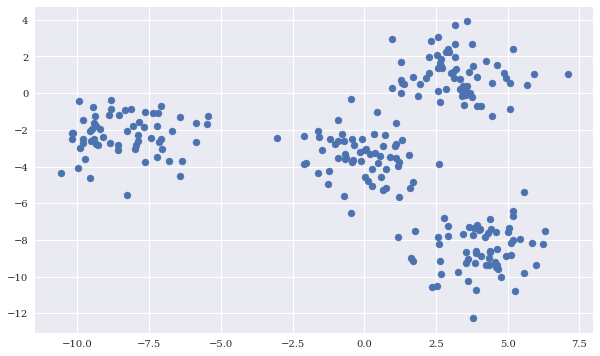

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], s=50)

In [9]:
## TODO k-means clustering (p445)

In [10]:
## TODO Gaussian mixture (p446)

In [ ]:
# Supervised Learning (p447)
# まずは分類アルゴリズム用のサンプルデータを生成する


## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>